import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [22]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/48

make measure image

In [8]:
def_img = io.imread("image\\10.16.2020 Heptane-60%water40%ethanol\\frame 3\\1-25-58 PM\\10.16.2020 (4) 0248.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

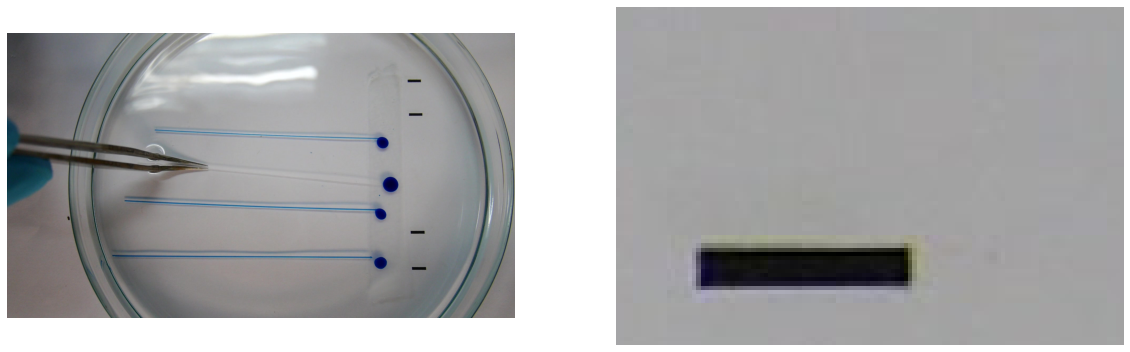

In [19]:
measure_im = crop(def_img, ((250, 750), (1500, 300), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

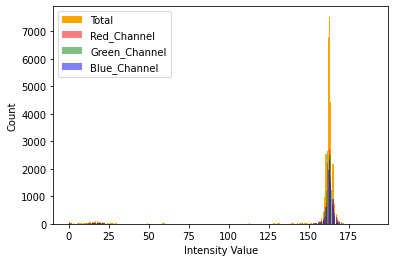

In [20]:
plot_histogram(measure_im)

[62, 20]
[61, 68]


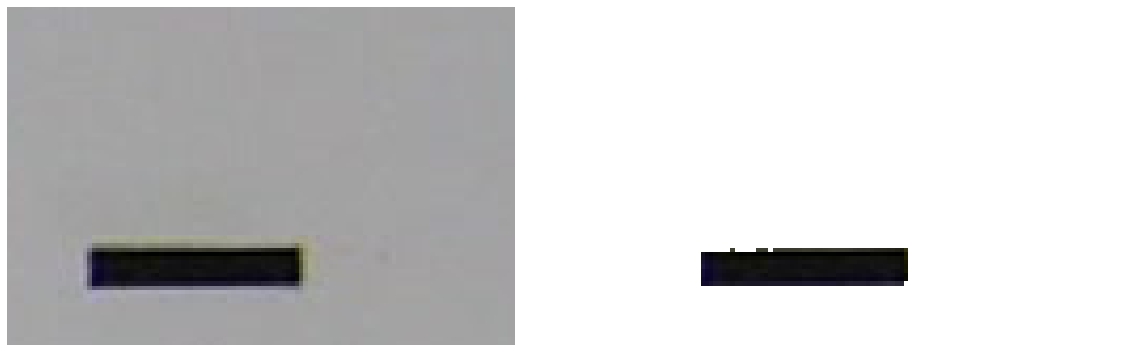

length of picture is  48.010415536631214 pixel


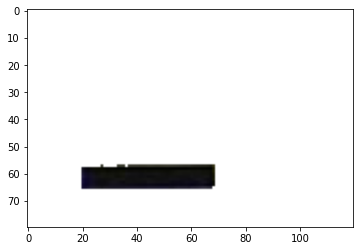

In [21]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

48 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 48


find definition length on 0248 picture

(1080, 1920, 3) (155, 760, 3)


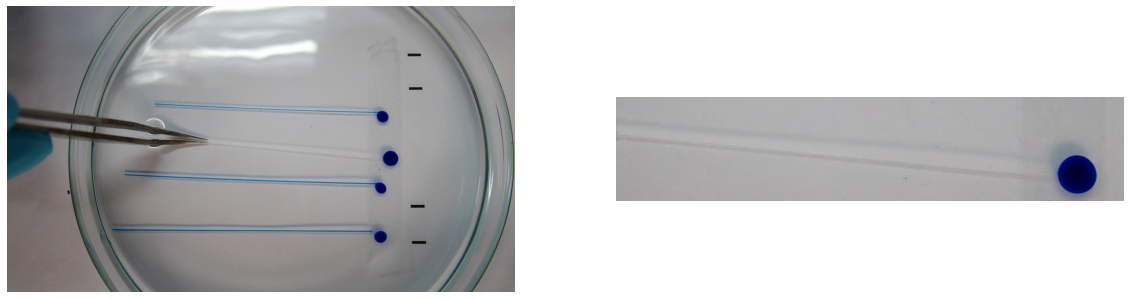

In [41]:
def_crop_im = crop(def_img, ((460, 465), (760, 400), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

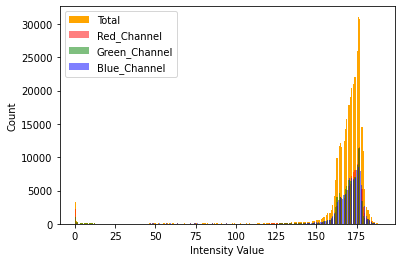

In [42]:
plot_histogram(def_crop_im)

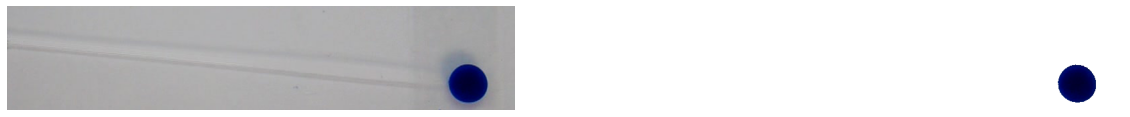

In [43]:
Tdef_img2 = thresholding(30,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[114, 661]
[117, 717]
ldef  56.08029957123981 pixel


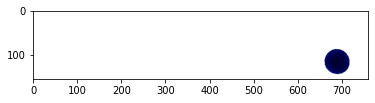

In [44]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 0248 to 0324

In [51]:
number_of_picture = 248
thresh = 45
template1 = []
l_def = 56.08029957123981
#324-248 = 76
for i in range(77):
    if(True) :   
        image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 3\\1-25-58 PM\\10.16.2020 (4) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((460, 465), (760, 400), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [52]:
print(template1)
print(len(template1))

[0, 0, 1, 1, 1, 2, 4, 6, 10, 15, 17, 19, 21, 22, 23, 663, 26, 665, 30, 31, 32, 33, 666, 663, 38, 664, 663, 41, 44, 664, 46, 664, 662, 50, 51, 53, 55, 56, 58, 60, 60, 62, 63, 64, 65, 67, 66, 64, 71, 76, 75, 78, 80, 78, 77, 84, 85, 90, 89, 88, 94, 94, 97, 99, 102, 103, 109, 108, 107, 108, 114, 115, 116, 120, 119, 124, 125]
77


find length on crop value 2 from 0325 to 2016

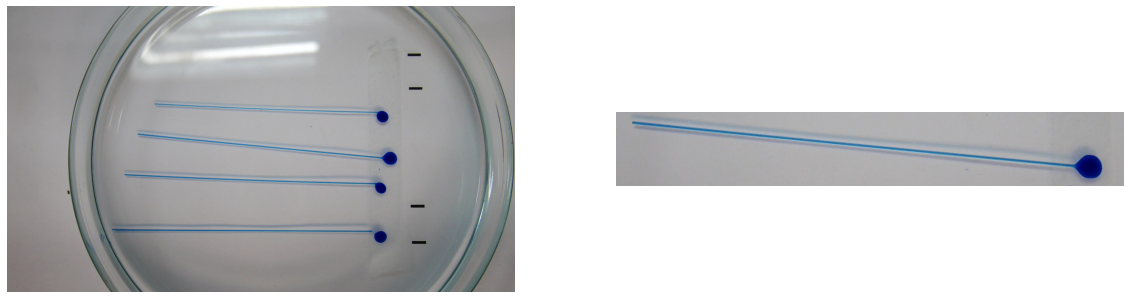

In [50]:
image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 3\\1-25-58 PM\\10.16.2020 (4) " + str(2016).zfill(4) + ".jpg" )
crop_image = crop(image, ((460, 465), (460, 400), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [53]:
number_of_picture = 325
thresh = 45
template2 = []
l_def = 56.08029957123981
#2016-325 = 1691
for i in range(1692):
    if( True) :
        image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 3\\1-25-58 PM\\10.16.2020 (4) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((460, 465), (460, 400), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [54]:
print(template2)
print(len(template2))

[127, 127, 130, 132, 134, 136, 140, 139, 143, 143, 145, 149, 151, 150, 153, 156, 155, 155, 163, 164, 163, 166, 170, 168, 172, 174, 178, 177, 179, 180, 184, 187, 187, 188, 190, 193, 194, 197, 197, 198, 203, 204, 203, 206, 210, 213, 213, 213, 215, 219, 219, 220, 223, 224, 228, 229, 232, 233, 234, 237, 237, 240, 241, 243, 244, 246, 248, 248, 253, 252, 254, 256, 258, 259, 261, 263, 264, 265, 268, 268, 270, 271, 273, 275, 276, 279, 281, 281, 285, 285, 284, 285, 286, 288, 292, 293, 293, 296, 294, 298, 300, 301, 301, 302, 308, 309, 311, 310, 314, 316, 316, 316, 319, 320, 320, 321, 322, 326, 327, 329, 330, 332, 332, 333, 333, 333, 336, 338, 340, 342, 343, 345, 348, 348, 351, 350, 352, 354, 355, 353, 356, 360, 359, 361, 364, 364, 366, 368, 364, 365, 371, 371, 371, 373, 377, 378, 380, 382, 382, 383, 384, 384, 385, 388, 390, 389, 391, 390, 396, 396, 396, 399, 401, 402, 402, 404, 406, 407, 409, 410, 411, 412, 413, 414, 415, 417, 419, 419, 420, 420, 423, 424, 426, 428, 428, 429, 430, 431, 433, 435,

concat 2 template and calculate pixel to centimeter

In [55]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [56]:
print(l_array)

[0.         0.         0.01041667 ... 9.635417   9.635417   9.635417  ]


export data to exel

In [57]:
import pandas as pd

In [58]:
print(len(l_array))

1769


In [59]:
data = []
num_img = 248
for i in range(len(l_array)):
    data.append(( " 10.16.2020 (4) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptanewater-60-40(3)_10.16.2020_1-25-58-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


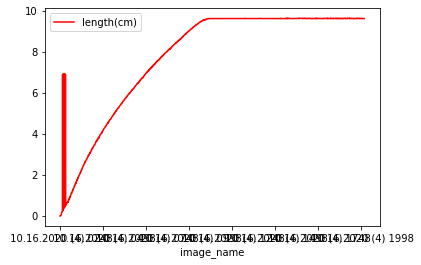

In [60]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()